In [240]:
import pandas as pd
import numpy as np
import plotly as pl
import matplotlib.pyplot as plt


### Data Description

In [241]:
data_dir = 'TSLA.csv'
df = pd.read_csv(data_dir, parse_dates=True, index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


In [ ]:
# transfer to new column and name it date
df['Date'] = df.index
df['Date'] = pd.to_datetime(df['Date'])

# Need different scales of time for data analysis
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

df.dtypes
df


,Open,High,Low,Close,Adj Close,Volume,Date,Day_of_Week,Month
Date,,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010-06-29,1,6
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010-06-30,2,6
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010-07-01,3,7
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010-07-02,4,7
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010-07-06,1,7
...,...,...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022-03-18,4,3
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022-03-21,0,3
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022-03-22,1,3


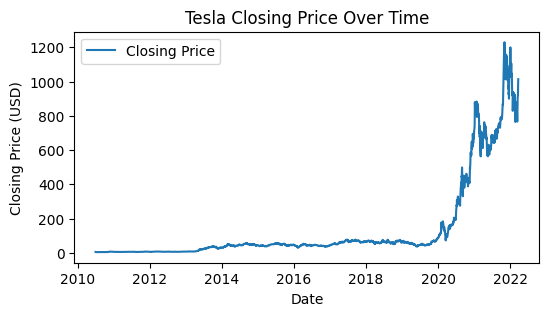

In [246]:
# Visualize stock prices to identify outliers
plt.figure(figsize=(6, 3))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [247]:
# Remove any outliers that may have unrealistic values (zero or less than zero)
df = df[df['Close'] > 0]
df = df[df['Open'] > 0]
df = df[df['Volume'] > 0]
df = df[df['High'] > 0]
df = df[df['Low'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Open         2956 non-null   float64       
 1   High         2956 non-null   float64       
 2   Low          2956 non-null   float64       
 3   Close        2956 non-null   float64       
 4   Adj Close    2956 non-null   float64       
 5   Volume       2956 non-null   int64         
 6   Date         2956 non-null   datetime64[ns]
 7   Day_of_Week  2956 non-null   int32         
 8   Month        2956 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1)
memory usage: 207.8 KB


### Exploratory Data Analysis (EDA)

In [248]:
df.describe() # display summary statistics

,Open,High,Low,Close,Adj Close,Volume,Date,Day_of_Week,Month
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03,2956,2956.000000,2956.000000
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07,2016-05-11 07:21:21.190798336,2.022327,6.582882
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05,2010-06-29 00:00:00,0.000000,1.000000
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07,2013-06-05 18:00:00,1.000000,4.000000
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07,2016-05-11 12:00:00,2.000000,7.000000
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07,2019-04-19 00:00:00,3.000000,10.000000
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08,2022-03-24 00:00:00,4.000000,12.000000
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07,NaN,1.399362,3.451707


In [ ]:
# Remove 'Date' column
df = df.drop(columns=['Date'])

# Add 'Time_Step' column as the index (1 to x)
df = df.reset_index(drop=True)
df['Time_Step'] = df.index + 1  # Add 1 to start from 1 instead of 0

# Move 'Time_Step' column to the front
df = df[['Time_Step'] + [col for col in df.columns if col != 'Time_Step']]

# Calculate Price_Movement for 7 days
df['Price_Movement'] = (df['Close'] - df['Close'].shift(7)).round(6)


# Add 7-day ahead target column and binary indicator for price increase
df['Target_Close_7d'] = df['Close'].shift(-7)
df['Price_Increase_7d'] = (df['Target_Close_7d'] > df['Close']).astype(int)

# calculate daily returns, percentage change in closing price
df['Daily_Return'] = df['Close'].pct_change().round(6)

# calculate rolling volatility
df['Volatility'] = df['Daily_Return'].rolling(window=21).std().round(6) # monthly volatility for 21 working days each
volatility = df[['Volatility']].dropna() # dropping NaN values

           SMA_7      SMA_30     SMA_100
0            NaN         NaN         NaN
1            NaN         NaN         NaN
2            NaN         NaN         NaN
3            NaN         NaN         NaN
4            NaN         NaN         NaN
...          ...         ...         ...
2951  831.304278  856.655998  988.279197
2952  843.141419  856.583997  987.306497
2953  871.517133  859.471995  986.867697
2954  904.765703  862.042328  986.088396
2955  935.055699  864.772994  985.087596

[2956 rows x 3 columns]


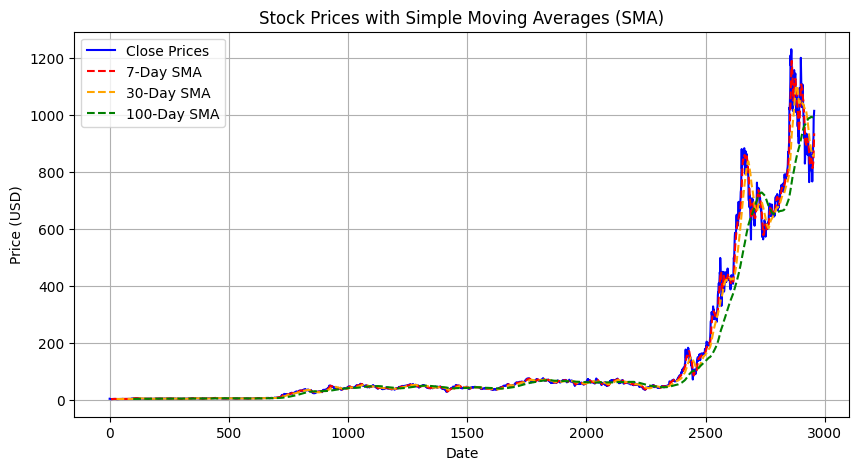

In [ ]:
# Calculate 7-day 30-day and 100-day Simple Moving Averages
df['SMA_7'] = df['Close'].rolling(window=7).mean().round(6)
df['SMA_30'] = df['Close'].rolling(window=30).mean().round(6)
df['SMA_100'] = df['Close'].rolling(window=100).mean().round(6)
print(df[['SMA_7', 'SMA_30', 'SMA_100']])

# Plotting the price at close and 3 sma's for visual representation of trends
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Prices', color='blue')
plt.plot(df['SMA_7'], label='7-Day SMA', color='red', linestyle='--')
plt.plot(df['SMA_30'], label='30-Day SMA', color='orange', linestyle='--')
plt.plot(df['SMA_100'], label='100-Day SMA', color='green', linestyle='--')
plt.title('Stock Prices with Simple Moving Averages (SMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


**Bollinger Bands**

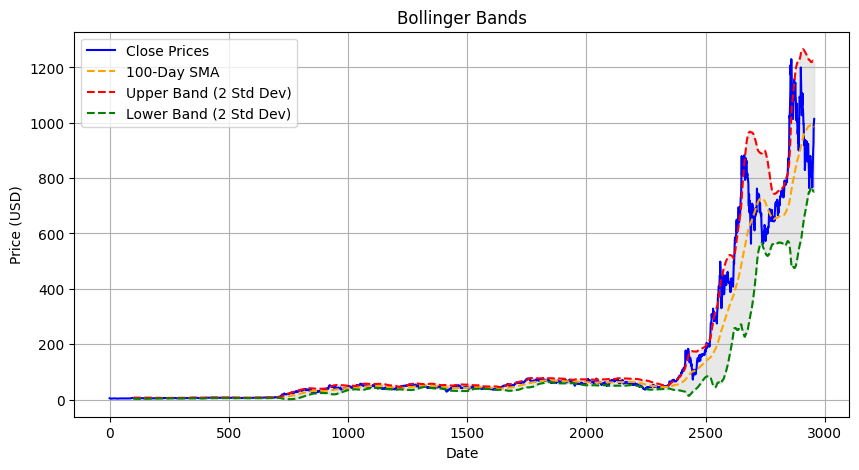

In [ ]:
# Calculate the standard deviation of closing price
df['Std_Dev_100'] = df['Close'].rolling(window=100).std().round(6)

# Calculate the upper and lower Bollinger Bands
df['Upper_Band'] = (df['SMA_100'] + (df['Std_Dev_100'] * 2)).round(6)
df['Lower_Band'] = (df['SMA_100'] - (df['Std_Dev_100'] * 2)).round(6)

# Plotting the Closing Prices and Bollinger Bands
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Prices', color='red')
plt.plot(df['SMA_100'], label='SMA 100-Day', color='green', linestyle='--')
plt.plot(df['Upper_Band'], label='Upper Band (2 Std Dev)', color='blue', linestyle='--')
plt.plot(df['Lower_Band'], label='Lower Band (2 Std Dev)', color='purple', linestyle='--')
plt.fill_between(df.index, df['Upper_Band'], df['Lower_Band'], color='lightgray', alpha=0.5)

plt.title('Bollinger Bands')
plt.xlabel('Time')
plt.ylabel('USD Price')
plt.legend()
plt.grid(True)
plt.show()

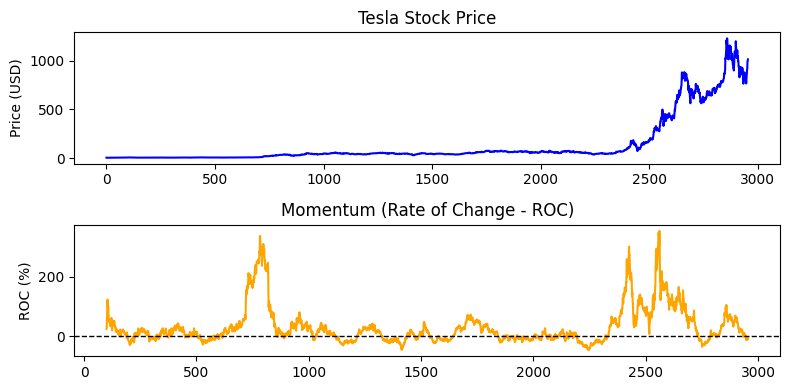

DataFrame contains NaN values before sequence generation.
Time_Step              0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Day_of_Week            0
Month                  0
Price_Movement         1
Target_Close_7d        7
Price_Increase_7d      0
Daily_Return           1
Volatility            21
SMA_7                  6
SMA_30                29
SMA_100               99
Std_Dev_100           99
Upper_Band            99
Lower_Band            99
Momentum_ROC         100
dtype: int64


In [ ]:
# Plots momentum and adds it to dataset for predictions and visual representation
df['Momentum_ROC'] = (df['Close'].pct_change(periods=100)).round(6) * 100  

plt.figure(figsize=(8, 4)) 

plt.subplot(2, 1, 1) 
plt.plot(df.index, df['Close'], label='Close price', color='red')
plt.title('Stock $ of Tesla')
plt.ylabel('USD Price')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['Momentum_ROC'], label='Momentum (ROC)', color='green')
plt.axhline(0, color='black', linewidth=1.5, linestyle='--') 
plt.title('Momentum (Rate of Change - ROC)')
plt.ylabel('ROC (%)')

plt.tight_layout()
plt.show()

# Check for NaNs in the entire DataFrame
if df.isna().any().any():
    print("DataFrame contains NaN values")
    print(df.isna().sum())
else:
    print("No NaNs in DataFrame")

# Drop any row with missing values
df = df.dropna()

df.to_csv("tesla_data_other.csv", index=False)